<a href="https://colab.research.google.com/github/g1o112/Estudo_ML/blob/main/Se%C3%A7%C3%A3o3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

###Base de dados Crédito


In [164]:
base_credit = pd.read_csv('credit_data.csv')

In [165]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [166]:
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [167]:
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [168]:
np.unique(base_credit['default'], return_counts=True) #1717 que pagam o empréstimo e 283 que não pagam o empréstimo

(array([0, 1]), array([1717,  283]))

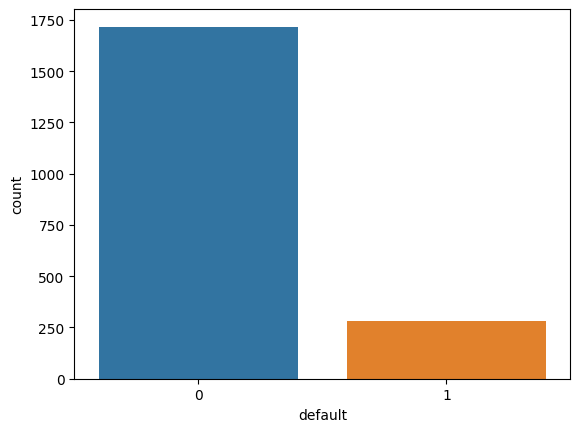

In [169]:
sns.countplot(x=base_credit['default']);

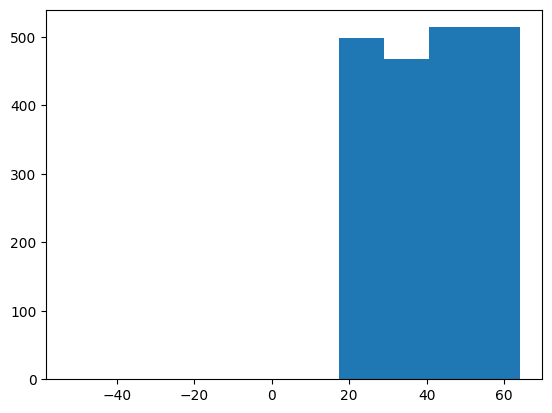

In [170]:
plt.hist(x=base_credit['age']);

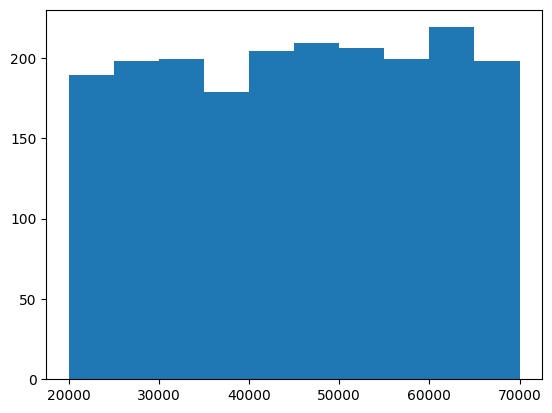

In [171]:
plt.hist(x=base_credit['income']);

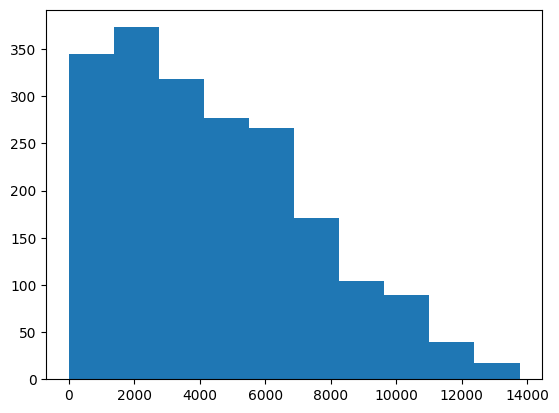

In [172]:
plt.hist(x=base_credit['loan']);

In [173]:
grafico = px.scatter_matrix(base_credit, dimensions = ['age', 'income', 'loan'], color = 'default')
grafico.show()

##Tratamento de valores inconsistentes (age -0)

In [174]:
base_credit.loc[base_credit['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [175]:
base_credit[base_credit['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [176]:
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [177]:
#preencher manualmente os valores
#preenchwer com a media
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [178]:
base_credit.loc[base_credit['age']<0, 'age'] = 40.92 #caso nao colocar o age no final, ele muda a linha inteira dos age < 0

In [179]:
base_credit.loc[base_credit['age']<0]

,clientid,income,age,loan,default


In [180]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [181]:
grafico = px.scatter_matrix(base_credit, dimensions = ['age', 'income', 'loan'], color = 'default')
grafico.show()

In [182]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [183]:
base_credit.loc[pd.isnull(base_credit['age'])] #só mostra os valores nulos na tabela ai

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [184]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [185]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [186]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32) ]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [187]:
base_credit.loc[base_credit['clientid'].isin([29,31,32])] #jeito mais simples

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


##Pré processamento

In [188]:
x_credit = base_credit.iloc[:, 1:4].values # nos : ele vai pegar todos os dados da tabela e depois vai usar só as colunas 1 2 e 3 (vai ate quatro mas o python nao conta)
type(x)

numpy.ndarray

In [189]:
y_credit = base_credit.iloc[:, 4].values

In [190]:
type(y_credit)

numpy.ndarray

##Escalonamento dos valores

In [191]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [192]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [193]:
from sklearn.preprocessing import StandardScaler #normalização para o ia nao achar que um ngc é mais importante que outro só porque é maior

scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [194]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [195]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

#Base de dados census
###Exploração de dados

In [196]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [197]:
base_census.describe()



,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [198]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [199]:
np.unique(base_census['income'], return_counts= True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

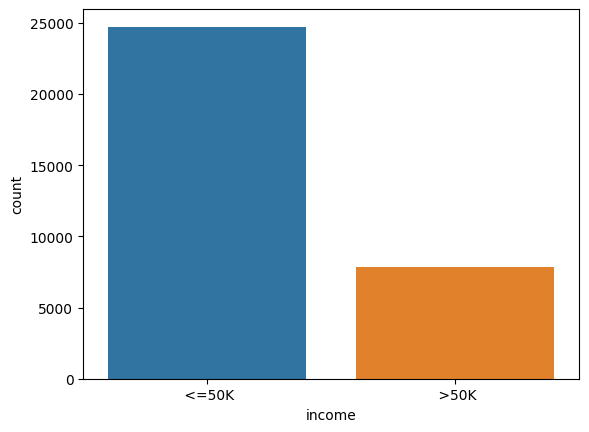

In [200]:
sns.countplot(x = base_census['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

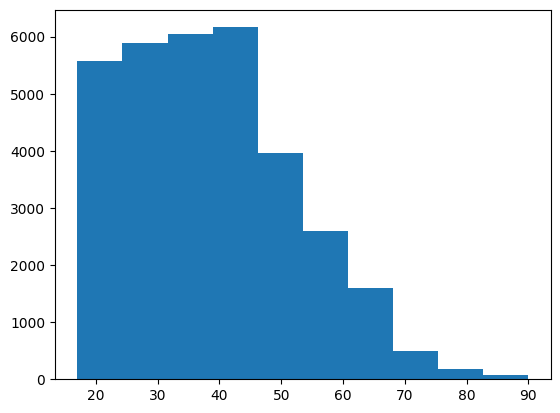

In [201]:
plt.hist(x= base_census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

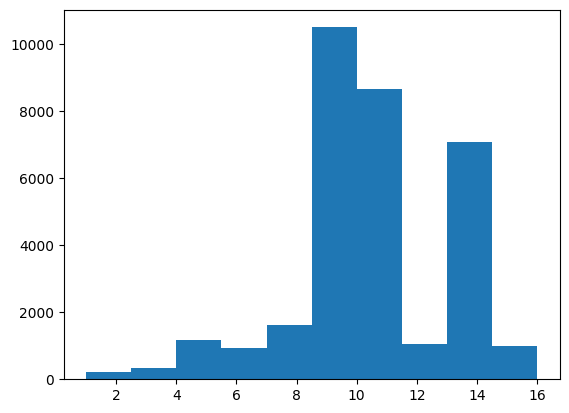

In [202]:
plt.hist(x= base_census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

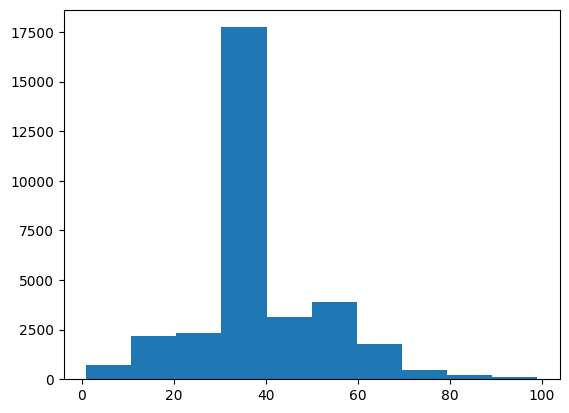

In [203]:
plt.hist(x= base_census['hour-per-week'])

In [204]:
grafico = px.treemap(base_census, path = ['workclass', 'age'])
grafico.show()

In [205]:
grafico = px.treemap(base_census, path = ['occupation', 'relationship', 'age'])
grafico.show()

In [206]:
grafico = px.parallel_categories(base_census, dimensions = ['occupation', 'relationship'])
grafico.show()

In [207]:
grafico = px.parallel_categories(base_census, dimensions = ['workclass', 'occupation', 'income'])
grafico.show()

#Divisao entre previsores e classe


In [208]:
x = base_census.iloc[:, 0:14].values
x[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [209]:
y = base_census.iloc[:, 14].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [210]:
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()

x[:, 1] = codificador.fit_transform(x[:, 1])
x[:, 3] = codificador.fit_transform(x[:, 3])
x[:, 5] = codificador.fit_transform(x[:, 5])
x[:, 6] = codificador.fit_transform(x[:, 6])
x[:, 7] = codificador.fit_transform(x[:, 7])
x[:, 8] = codificador.fit_transform(x[:, 8])
x[:, 9] = codificador.fit_transform(x[:, 9])
x[:, 13] = codificador.fit_transform(x[:, 13])



In [211]:
x

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

#OneHotEnconder
> Com o labelencoder colocando um numero para cada categoria diferente, o modelo mais para frente pode deduzie que tal categoria é mais importante por ter um numero maior que outra (oque é horrivel se estamos falando de por exemplo carros populares e ele achar que um é melhor que o outro porque seu numero é maior - 1, 2 , 3.



In [212]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder= 'passthrough')


In [213]:
x = one_hot.fit_transform(x).toarray()

In [214]:
x

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [215]:
x[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [216]:
x.shape #antes tinhamos 15 e agora aumentamos para 108

(32561, 108)

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler_census = StandardScaler()
x = scaler_census.fit_transform(x)
x[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [221]:
from sklearn.model_selection import train_test_split

x_credit_treino, x_credit_test, y_credit_treino, y_credit_teste = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [223]:
x_credit_treino.shape

(1500, 3)

In [224]:
y_credit_treino.shape

(1500,)

In [225]:
x_census_treino, x_census_teste, y_census_treino, y_census_teste = train_test_split(x,y, test_size = 0.15, random_state=0)

In [231]:
x_census_treino.shape, y_census_treino.shape

((27676, 108), (27676,))

In [233]:
import pickle
with open('credit.pkl', mode= 'wb') as f:
  pickle.dump([x_credit_treino, x_credit_test, y_credit_treino, y_credit_teste], f)

In [234]:
with open('census.pkl', mode= 'wb') as f:
  pickle.dump([x_census_treino, x_census_teste, y_census_treino, y_census_teste], f)